This notebook is recreating a [tutorial](https://ipython-books.github.io/124-simulating-a-partial-differential-equation-reaction-diffusion-systems-and-turing-patterns/) that describes how to solve PDE's, specifically turing PDE's. This method doesn't use sympy or any other function library for DE solving.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We are going to simulate the following PDE's in the domain $E=[-1,1]^2$.
\begin{align}
    \frac{\partial u}{\partial t} =& a \Delta u + u - u^3 - v + k \\
    \tau \frac{\partial v}{\partial t} =& b \Delta v + u - v \\
\end{align}
This PDE system was originally created to model [neuron activation](https://en.wikipedia.org/wiki/FitzHugh%E2%80%93Nagumo_model) where $u,w$ would represent voltage and current respectivley.
- *When voltage $u$ surpassed a threshold, the neuron would depolarise causing current $w$ to increase and voltage to decrease. When completley depolarised, the current would decrease and the voltage could build up again. This would keep repeating.*
In this model, $u$ is a pigmenting molecule and $v$ is an inhibitory molecule.

Starting off the parameters of the model are defined.

In [2]:
a = 2.8e-4
b = 5e-3
tau = .1
k = -.005

Then define the parameters of the simulation.

In [3]:
size = 50 # The size of the 2D grid
dx = 2./size # space step?
T = 9.0 # Total time
dt = 0.001 # time step
n = int(T/dt) # number of iterations

Each point of the grid will be initialised with a random value between 0 and 1.

In [4]:
U = np.random.rand(size, size)
V = np.random.rand(size, size)

The PDE system described uses the [Laplacian operator](https://en.wikipedia.org/wiki/Discrete_Laplace_operator#Finite_differences) ($\Delta$) which can be approximated to the discrete function:
\begin{equation}
    \Delta u(x,y) \simeq \frac{u(x+h,y) + u(x-h,y) + u(x,y+h) + u(x,y-h) -4u(x,y)}{dx^2}
\end{equation}

In [5]:
def laplacian(Z):
    Ztop    = Z[0:-2, 1:-1]
    Zbottom = Z[2:,  1:-1]
    Zright  = Z[1:-1, 0:-2]
    Zleft   = Z[1:-1,  2:]
    Zcentre = Z[1:-1, 1:-1]
    return (Ztop + Zbottom + Zright + Zleft - 4*Zcentre)/(dx**2)

Create a function for displaying the matrix.

In [6]:
def show_patterns(U, ax=None):
    ax.imshow(U, cmap=plt.cm.cividis, extent=[-1,1,-1,1])
    ax.set_axis_off()

Now the simulation.

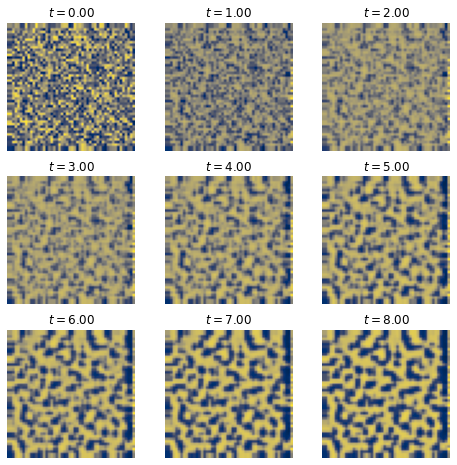

In [7]:
fig, axs = plt.subplots(3,3, figsize=(8,8))
step_plot = n//9

# Loop through for n iterations
for i in range(n):
    # Calculate the laplacian of U and V
    deltaU = laplacian(U)
    deltaV = laplacian(V)
    
    # Everything but the edges are simulated
    Uc = U[1:-1, 1:-1]
    Vc = V[1:-1, 1:-1]
    
    # dx/dt = (x(t+dt) - x(t))/dt   =>   x(t+dt) = x(t) + dt*(dx/dt)
    U[1:-1, 1:-1] = Uc + dt*(a*deltaU + Uc - Uc**3 - Vc + k)
    V[1:-1, 1:-1] = Vc + dt*(b*deltaV + Uc - Vc)/tau

    # Assign edge values to the adjacent pixel towards the centre
    for Z in (U,V):
        Z[0,:]  = Z[1 ,: ]
        Z[-1,:] = Z[-2,: ]
        Z[:,0]  = Z[: ,1 ]
        Z[:,-1] = Z[: ,-1]
    
    # Plot
    if i % step_plot==0 and i<9*step_plot:
        ax = axs.flat[i//step_plot]
        show_patterns(U,ax=ax)
        ax.set_title(f'$t={i*dt:.2f}$')

This tutorial implemeted Neumann boundary conditions, which impose that the boundary values are the same as the values adjacent to the boundary. However, below is the same simulation with periodic boundary conditions, this imposes that each edge is a portal to the oppoisite edge. The boundaries are simulated as the same as every other position.

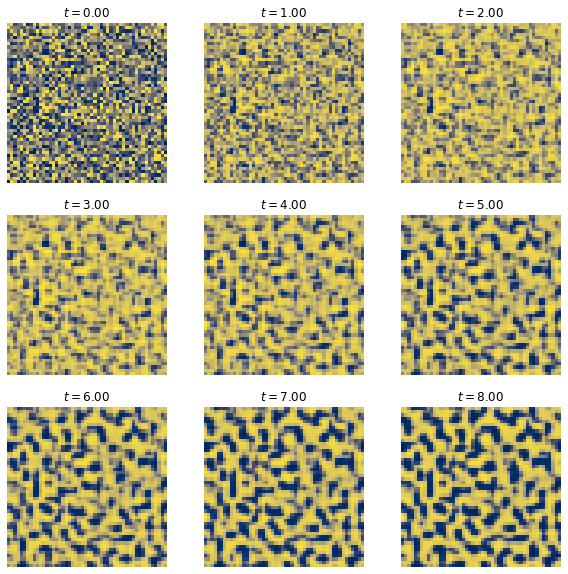

In [8]:
import numpy as np
import matplotlib.pyplot as plt
#


a = 2.8e-4
b = 5e-3
tau = .1
k = -.005

#
size = 50 # The size of the 2D grid
dx = 2./size # space step?
T = 9.0 # Total time
dt = 0.0001# time step
n = int(T/dt) # number of iterations
#
U = np.random.rand(size, size)
V = np.random.rand(size, size)
#
def show_patterns(U, ax=None):
    ax.imshow(U, cmap=plt.cm.cividis, extent=[-1,1,-1,1])
    ax.set_axis_off()
#
def laplacian(Z):
    return (
        - 4 * Z
        + np.roll(Z,1,axis=0) 
        + np.roll(Z,-1,axis=0)
        + np.roll(Z,+1,axis=1)
        + np.roll(Z,-1,axis=1)
    ) / (dx ** 2)
#
fig, axs = plt.subplots(3,3, figsize=(10,10))
step_plot = n//9
# Loop through for n iterations
for i in range(n):
    # Calculate the laplacian of U and V
    deltaU = laplacian(U)
    deltaV = laplacian(V)
    
    # dx/dt = (x(t+dt) - x(t))/dt   =>   x(t+dt) = x(t) + dt*(dx/dt)
    U = U + dt*(a*deltaU + U - U**3 - V + k)
    V = V + dt*(b*deltaV + U - V)/tau
    
    # Plot
    if i % step_plot==0 and i<9*step_plot:
        ax = axs.flat[i//step_plot]
        show_patterns(U,ax=ax)
        ax.set_title(f'$t={i*dt:.2f}$')

To demonstrate the boudary condition, the system at the final time point has been tiled in 2x2 figure below. As you can see, tere is no visible boundaries in the image.

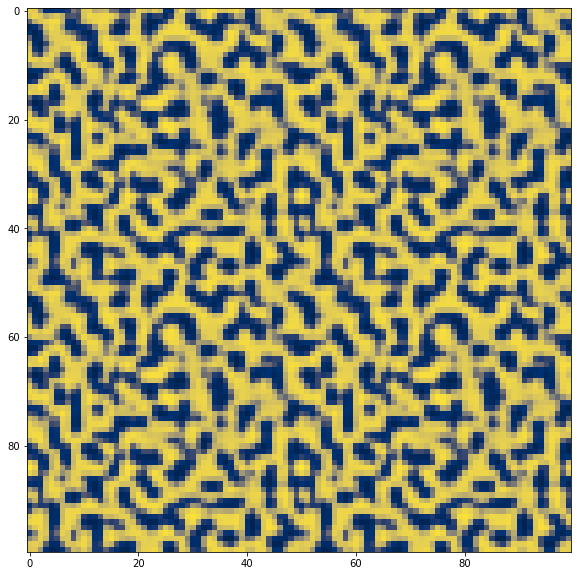

In [9]:
plt.figure(figsize = (10,10))
plt.imshow(np.tile(U,(2,2)), cmap=plt.cm.cividis)

Now inspecting the V component of the model:

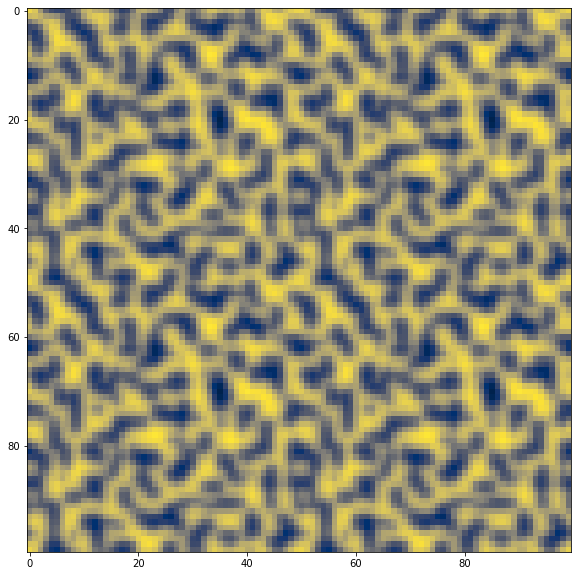

In [10]:
plt.figure(figsize = (10,10))
plt.imshow(np.tile(V,(2,2)), cmap=plt.cm.cividis)

This componenet is not as intense. This makes sense when as the current component of the [FitzHugh–Nagumo model](https://en.wikipedia.org/wiki/FitzHugh%E2%80%93Nagumo_model#/media/File:Fitzhugh_Nagumo_Phase_Space_Graph.png) is not as big as the voltage component.

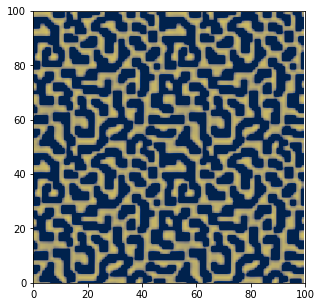

In [11]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
import ffmpeg


# U = np.ones([100,100])
# V = np.ones([100,100])
size = 50
U = np.random.rand(size, size)
V = np.random.rand(size, size)

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize = (5,5))
ax = plt.axes(xlim=(0, size*2), ylim=(0, size*2))
grid = ax.imshow(np.tile(U,(2,2)), cmap=plt.cm.cividis)
dx = 2./size
dt = 0.0001

a = 2.8e-4
b = 5e-3
tau = .1
k = -.005

def laplacian(Z):
    return (
        - 4 * Z
        + np.roll(Z,1,axis=0) 
        + np.roll(Z,-1,axis=0)
        + np.roll(Z,+1,axis=1)
        + np.roll(Z,-1,axis=1)
    ) / (dx ** 2)


# initialization function: plot the background of each frame
def init():
    grid.set_data(np.tile(U,(2,2)))
    return grid,

# animation function.  This is called sequentially
def animate(i):
    global U, V
    for loop in range(1000):
        deltaU = laplacian(U)
        deltaV = laplacian(V)
        # dx/dt = (x(t+dt) - x(t))/dt   =>   x(t+dt) = x(t) + dt*(dx/dt)
        U = U + dt*(a*deltaU + U - U**3 - V + k)
        V = V + dt*(b*deltaV + U - V)/tau
    grid.set_data(np.tile(U,(2,2)))
    return grid,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=1, blit=False)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('basic_animation.mp4', fps=30, dpi=50,  extra_args=['-vcodec', 'libx264'])

plt.show()

In [12]:
from IPython.display import Video

Video("basic_animation.mp4")